In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("profit_data.csv")

In [5]:
data

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [6]:
data.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [7]:
data.tail()

,Marketing Spend,Administration,Transport,Area,Profit
45,1000.23,124153.04,1903.93,Dhaka,64926.08
46,1315.46,115816.21,297114.46,Rangpur,49490.75
47,0.00,135426.92,0.00,Ctg,42559.73
48,542.05,51743.15,0.00,Dhaka,35673.41
49,0.00,116983.80,45173.06,Ctg,14681.40


In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [9]:
data.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [11]:
data[(data["Marketing Spend"]>10000)]

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [14]:
specific_coluumns = ["Dhaka"]
data[data["Area"].isin(specific_coluumns)]

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
3,144372.41,118671.85,383199.62,Dhaka,182901.99
5,131876.90,99814.71,362861.36,Dhaka,156991.12
8,120542.52,148718.95,311613.29,Dhaka,152211.77
15,165349.20,122616.84,261776.23,Dhaka,129917.04
17,94657.16,145077.58,282574.31,Dhaka,125370.37
19,86419.70,153514.11,0.00,Dhaka,122776.86
21,78389.47,153773.43,299737.29,Dhaka,111313.02
24,77044.01,99281.34,140574.81,Dhaka,108552.04
27,72107.60,127864.55,353183.81,Dhaka,105008.31


In [15]:
data[data["Area"].str.contains("Ctg")]

,Marketing Spend,Administration,Transport,Area,Profit
1,162597.70,151377.59,443898.53,Ctg,191792.06
6,134615.46,147198.87,127716.82,Ctg,156122.51
9,123334.88,108679.17,304981.62,Ctg,149759.96
11,100671.96,91790.61,249744.55,Ctg,144259.40
13,91992.39,135495.07,252664.93,Ctg,134307.35
16,78013.11,121597.55,264346.06,Ctg,126992.93
20,76253.86,113867.30,298664.47,Ctg,118474.03
25,64664.71,139553.16,137962.62,Ctg,107404.34
32,63408.86,129219.61,46085.25,Ctg,97427.84
34,46426.07,157693.92,210797.67,Ctg,96712.80


In [16]:
specific = ["Dhaka", "Ctg"]
data[data["Area"].isin(specific)]

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
3,144372.41,118671.85,383199.62,Dhaka,182901.99
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96
11,100671.96,91790.61,249744.55,Ctg,144259.40
13,91992.39,135495.07,252664.93,Ctg,134307.35
15,165349.20,122616.84,261776.23,Dhaka,129917.04


In [17]:
data["Administration"].mode()

0      51283.14
1      51743.15
2      65947.93
3      82982.09
4      84710.77
5      85047.44
6      91391.77
7      91790.61
8      96189.63
9      99281.34
10     99814.71
11    101145.55
12    103057.49
13    105751.03
14    108679.17
15    110594.11
16    113867.30
17    114175.79
18    115641.28
19    115816.21
20    116983.80
21    118546.05
22    118671.85
23    121597.55
24    122616.84
25    122782.75
26    124153.04
27    127056.21
28    127320.38
29    127382.30
30    127864.55
31    129219.61
32    135426.92
33    135495.07
34    136897.80
35    139553.16
36    144135.98
37    145077.58
38    145530.06
39    147198.87
40    148718.95
41    151377.59
42    152701.92
43    153032.06
44    153514.11
45    153773.43
46    154806.14
47    156547.42
48    157693.92
49    182645.56
Name: Administration, dtype: float64

In [21]:
data.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
data.isna().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

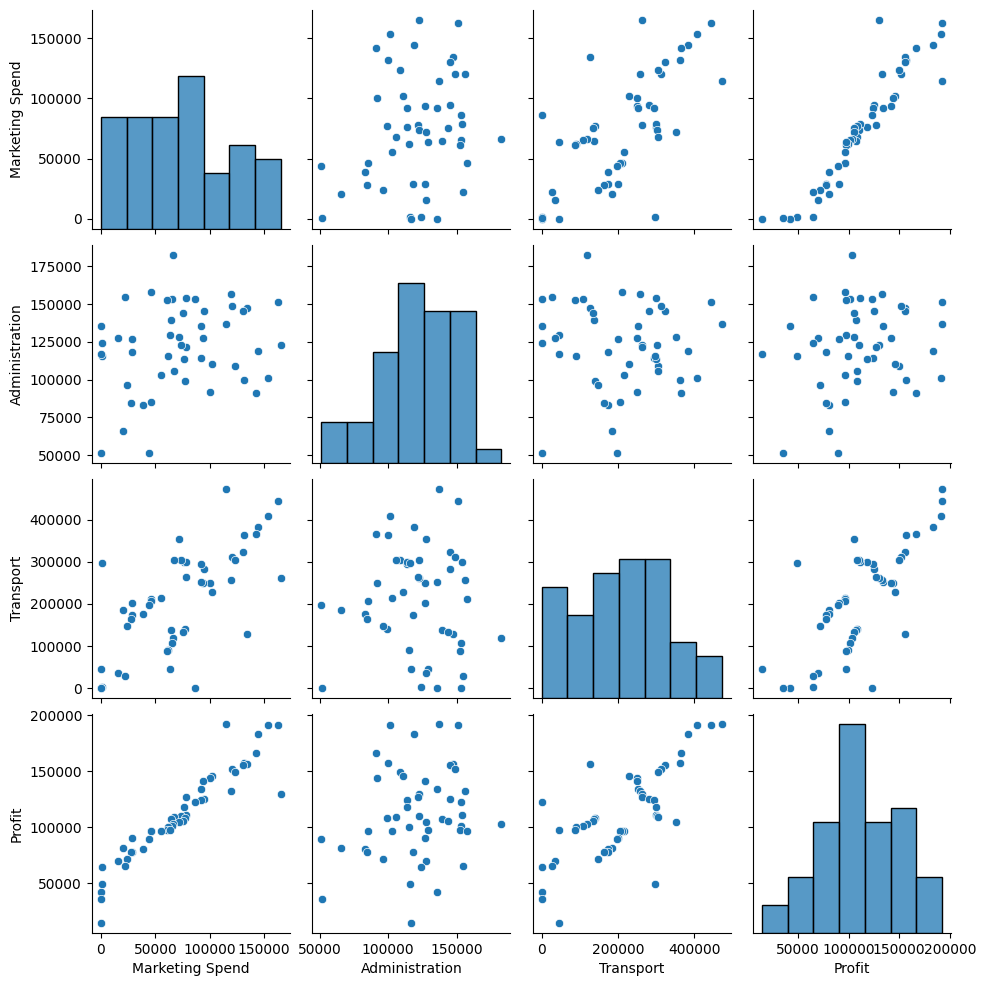

In [23]:
sns.pairplot(data)

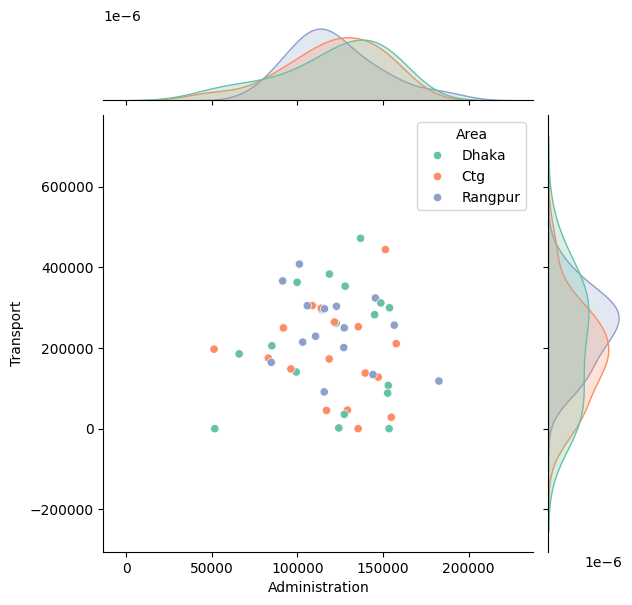

In [29]:
sns.jointplot(data = data, x = "Administration", y = "Transport", kind = "scatter", hue = "Area", palette = "Set2")

<Axes: xlabel='Area', ylabel='Profit'>

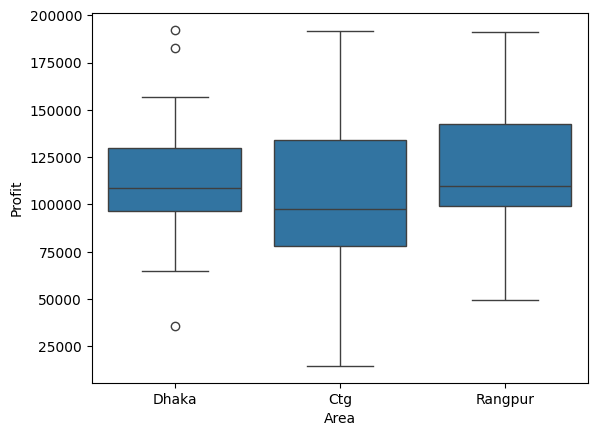

In [36]:
sns.boxplot(data=data, x = "Area", y = "Profit")

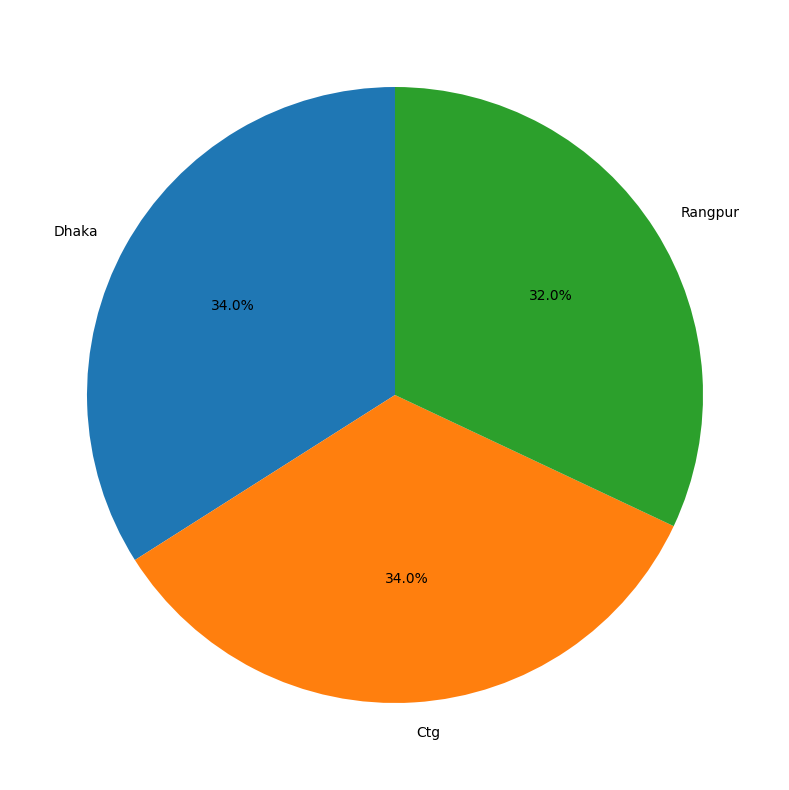

In [37]:
Area_condition = data["Area"].value_counts()
plt.figure(figsize = [12,8])
plt.pie(Area_condition, labels = Area_condition.index, autopct = "%1.1f%%", startangle = 90)
plt.tight_layout()
plt.show()

In [38]:
data.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [41]:
df = data.drop(["Profit"], axis =1)

In [42]:
df

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur
5,131876.90,99814.71,362861.36,Dhaka
6,134615.46,147198.87,127716.82,Ctg
7,130298.13,145530.06,323876.68,Rangpur
8,120542.52,148718.95,311613.29,Dhaka
9,123334.88,108679.17,304981.62,Ctg


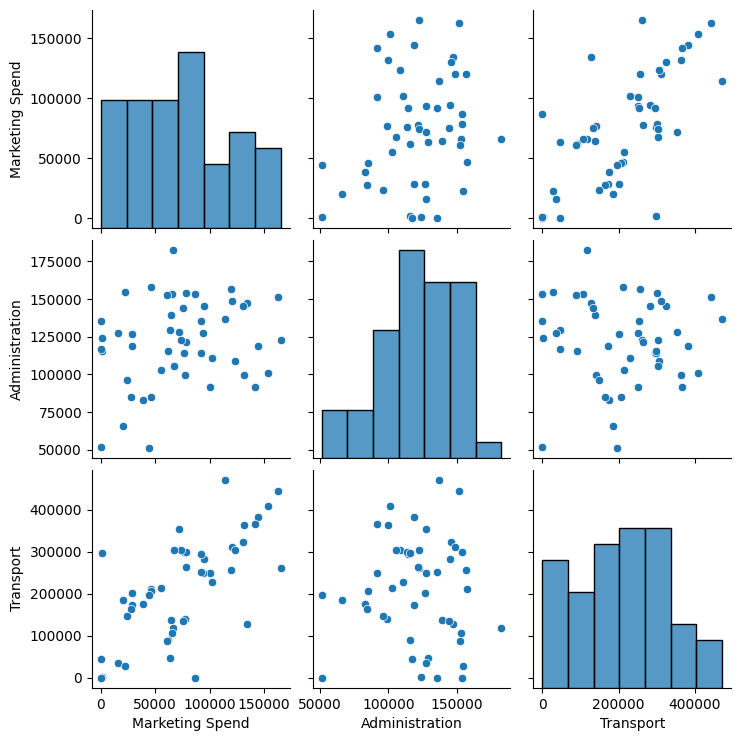

In [43]:
sns.pairplot(df)

In [44]:
y = data["Profit"]

In [45]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [50]:
city = pd.get_dummies(df["Area"], prefix = "Encoder", dtype = int)

In [51]:
city

,Encoder_Ctg,Encoder_Dhaka,Encoder_Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,1,0,0
7,0,0,1
8,0,1,0
9,1,0,0


In [52]:
city.head(5)

,Encoder_Ctg,Encoder_Dhaka,Encoder_Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


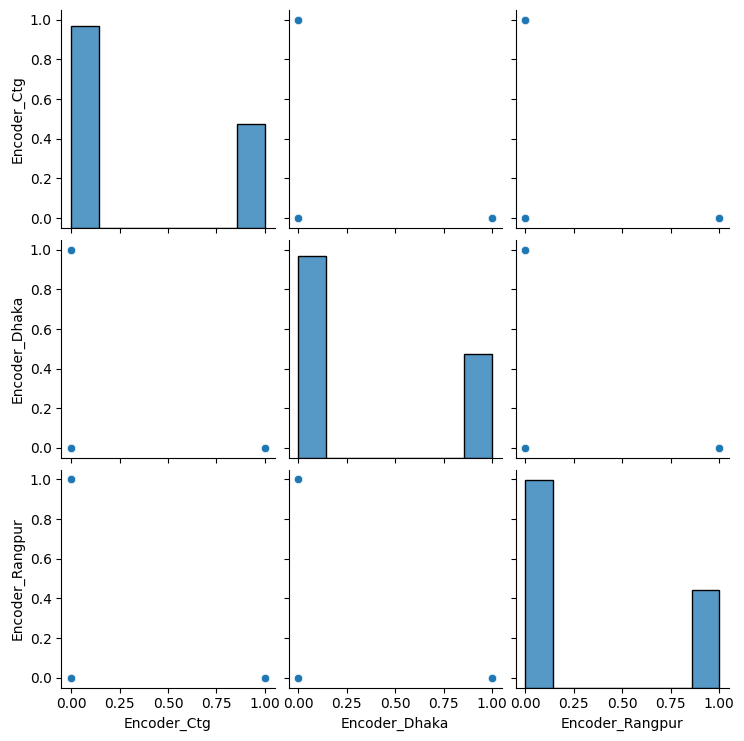

In [54]:
sns.pairplot(city)

In [55]:
x = df.drop(["Area"], axis = 1)

In [56]:
x.head(5)

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [62]:
df_model = pd.concat([x, city], axis = 1)

In [63]:
df_model

,Marketing Spend,Administration,Transport,Encoder_Ctg,Encoder_Dhaka,Encoder_Rangpur
0,114523.61,136897.80,471784.10,0,1,0
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,0,1,0
4,142107.34,91391.77,366168.42,0,0,1
5,131876.90,99814.71,362861.36,0,1,0
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,0,1
8,120542.52,148718.95,311613.29,0,1,0
9,123334.88,108679.17,304981.62,1,0,0


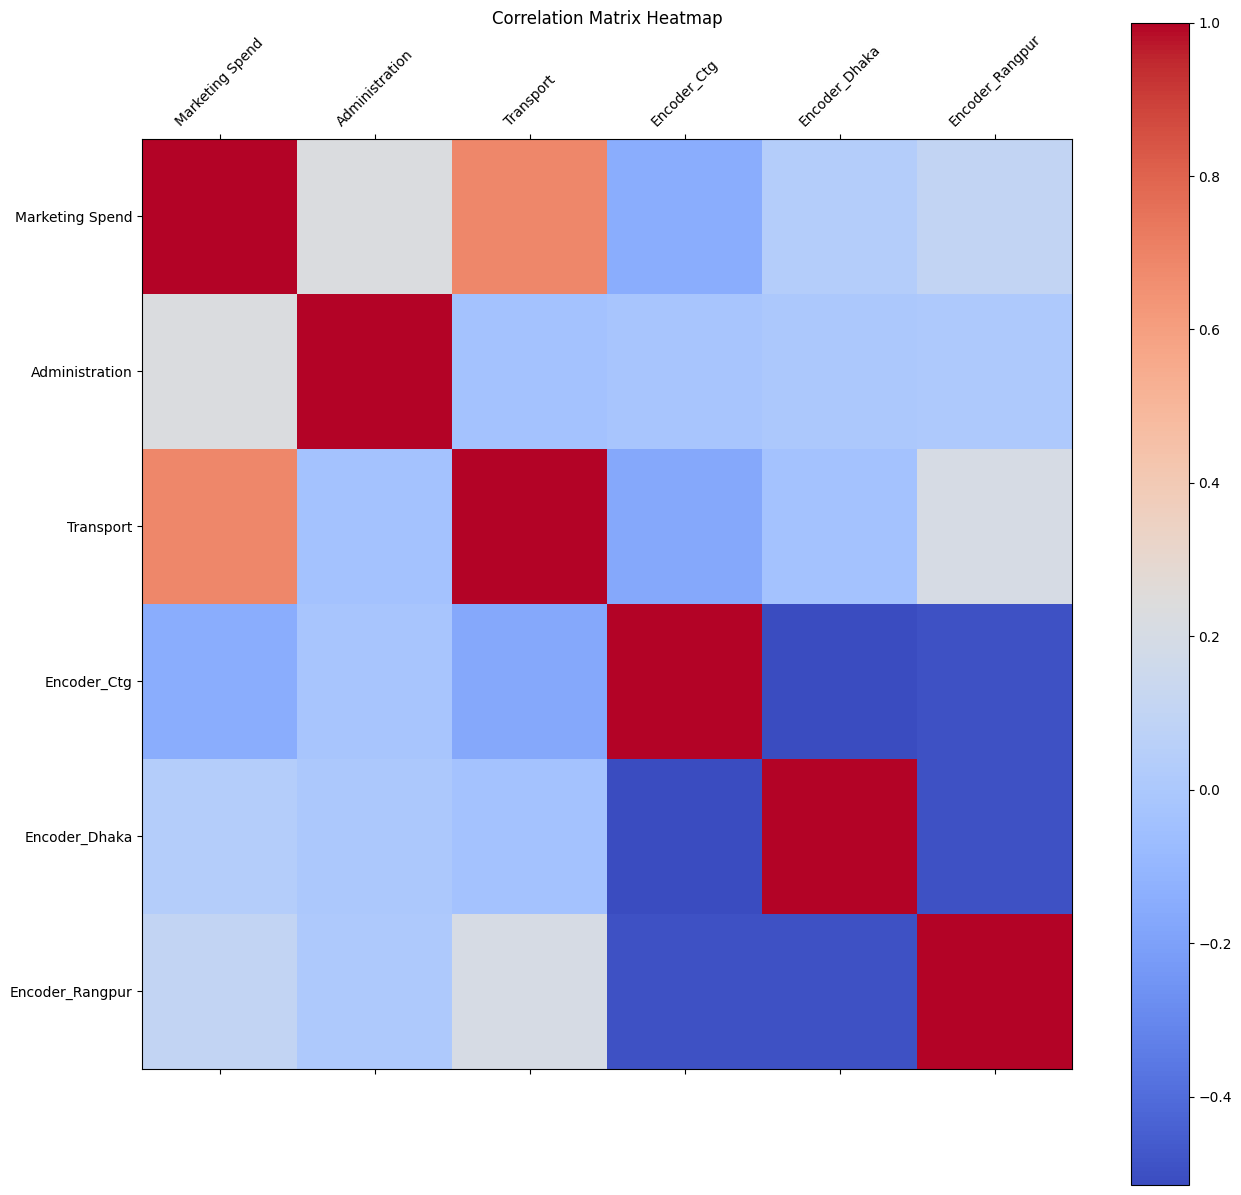

In [64]:
from matplotlib import rcParams
# Assuming df is already defined and contains your data
rcParams["figure.figsize"] = 20, 15  # Adjusted size for better visibility

# Calculate the correlation matrix
correlation_matrix = df_model.corr()

# Create the heatmap
plt.matshow(correlation_matrix, cmap='coolwarm')  # You can change the colormap if desired

# Set ticks and labels
plt.yticks(np.arange(len(df_model.columns)), df_model.columns)
plt.xticks(np.arange(len(df_model.columns)), df_model.columns, rotation=45)  # Rotate x labels for better readability

# Add color bar
plt.colorbar()

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [66]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [68]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
X_test

,Marketing Spend,Administration,Transport
13,91992.39,135495.07,252664.93
39,38558.51,82982.09,174999.30
30,61994.48,115641.28,91131.24
45,1000.23,124153.04,1903.93
17,94657.16,145077.58,282574.31
48,542.05,51743.15,0.00
26,75328.87,144135.98,134050.07
25,64664.71,139553.16,137962.62
32,63408.86,129219.61,46085.25
19,86419.70,153514.11,0.00


In [73]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [74]:
pred  = regressor.predict(X_test)

In [75]:
pred

array([126866.17489942,  83697.05442403,  92220.8558538 ,  43579.79616115,
       131408.52457625,  42377.06759152, 105245.13180531,  98418.28317687,
        89289.5155839 , 100811.25634886])

In [77]:
pred = regressor.predict(X_train)

In [78]:
pred

array([127783.47770883, 170039.53438043,  89026.19537046, 151337.60306583,
       173344.97072136, 144347.12817103,  75646.02181274,  70007.50844338,
        42854.63682772, 176590.65241277, 152211.69813435, 118421.65223996,
       106522.85359542,  92896.05387139,  91759.64323644, 161464.86851682,
        60400.24175161, 122451.14013937,  98751.75729999, 162989.98333349,
        96436.34953079, 131969.96857725,  79852.12486603, 191265.32663503,
       122149.26577639, 181435.77930414,  56305.88089676,  91421.00972936,
       114857.20687525,  77303.20146904, 131154.62565554, 119219.15203667,
       130254.09430548,  46694.03938386, 120225.39885853, 158920.17603698,
        71451.31410968, 146106.58053976,  98012.65987427,  72187.04450581])

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
from sklearn.metrics import r2_score

# Assuming X_test is your test features
# Ensure you're predicting on X_test
pred  = regressor.predict(X_test)
print(f"Predictions shape: {pred.shape}, y_test shape: {y_test.shape}")

Predictions shape: (10,), y_test shape: (10,)


In [85]:
# Calculate R^2 score
score = r2_score(y_test, pred)
print(f"R^2 Score: {score}")


R^2 Score: 0.8408317174645239


In [89]:
tree = DecisionTreeRegressor()
pred = tree.fit(X_train, y_train)

In [90]:
pred

DecisionTreeRegressor()

In [91]:
pred = tree.predict(X_test)

In [92]:
pred

array([141585.52,  78239.91,  97483.56,  42559.73, 124266.9 ,  49490.75,
       126992.93, 101004.64, 101004.64, 156122.51])

In [93]:
score = r2_score(y_test, pred)

In [94]:
score

0.7065076500901459

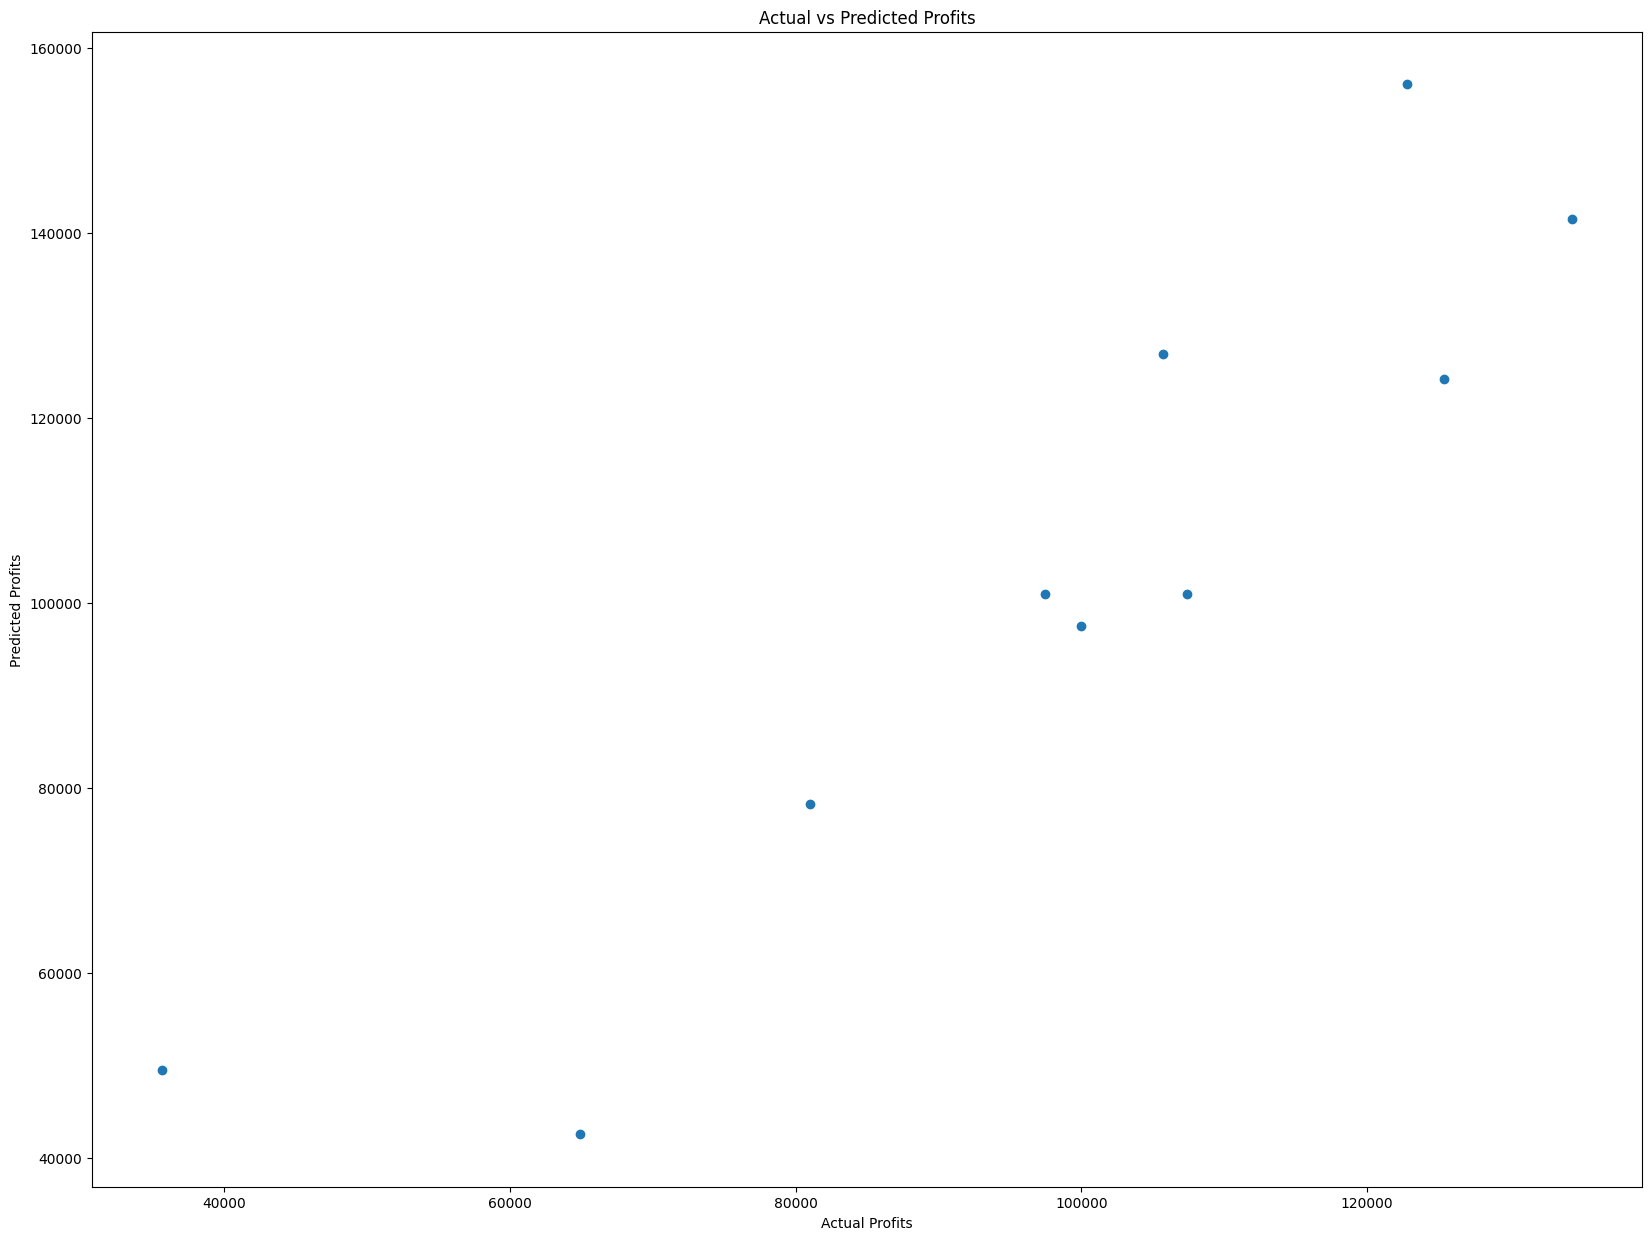

In [97]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Profits")
plt.ylabel("Predicted Profits")
plt.title("Actual vs Predicted Profits")
plt.show()